In [24]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection, preprocessing
import xgboost as xgb

In [25]:
input_df = pd.read_csv('HR_Analytics.csv')
input_df.head()


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [26]:
input_df.info()
#This reveals that certain data columns have the data type as object. I need to standardise this dataset into numerical values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [27]:
clean_df = input_df.copy()

for f in clean_df.columns:
    if clean_df[f].dtype == 'object':
        label = preprocessing.LabelEncoder()
        label.fit(list(clean_df[f].values))
        clean_df[f] = label.transform(list(clean_df[f].values))
clean_df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             0.56               2   
15                   0.38             0.54               2   
16                   0.45             0.47               2   
17                   0.78             0.99               4   
18                   0.45             0.51               2   
19                   0.76             0.89               5   
20                   0.11             0.83               6   
21                   0.38             0.55               2   
22                   0.09             0.95               6   
23                   0.46             0.57               2   
24                   0.40             0.53               2   
25                   0.89             0.92               5   
26                   0.82             0.87               4   
27                   0.40             0.49               2   
28                   0.41             0.46               2   
29                   0.38             0.50               2   
...                   ...              ...             ...   
14969                0.43             0.46               2   
14970                0.78             0.93               4   
14971                0.39             0.45               2   
14972                0.11             0.97               6   
14973                0.36             0.52               2   
14974                0.36             0.54               2   
14975                0.10             0.79               7   
14976                0.40             0.47               2   
14977                0.81             0.85               4   
14978                0.40             0.47               2   
14979                0.09             0.93               6   
14980                0.76             0.89               5   
14981                0.73             0.93               5   
14982                0.38             0.49               2   
14983                0.72             0.84               5   
14984                0.40             0.56               2   
14985                0.91             0.99               5   
14986                0.85             0.85               4   
14987                0.90             0.70               5   
14988                0.46             0.55               2   
14989                0.43             0.57               2   
14990                0.89             0.88               5   
14991                0.09             0.81               6   
14992                0.40             0.48               2   
14993                0.76             0.83               6   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                 

In [21]:
#Target values - If the employees left or not - 1 indicates yes, 0 indicates no. 
train_y = clean_df.left.values
train_x = clean_df.drop(["left"],axis=1)


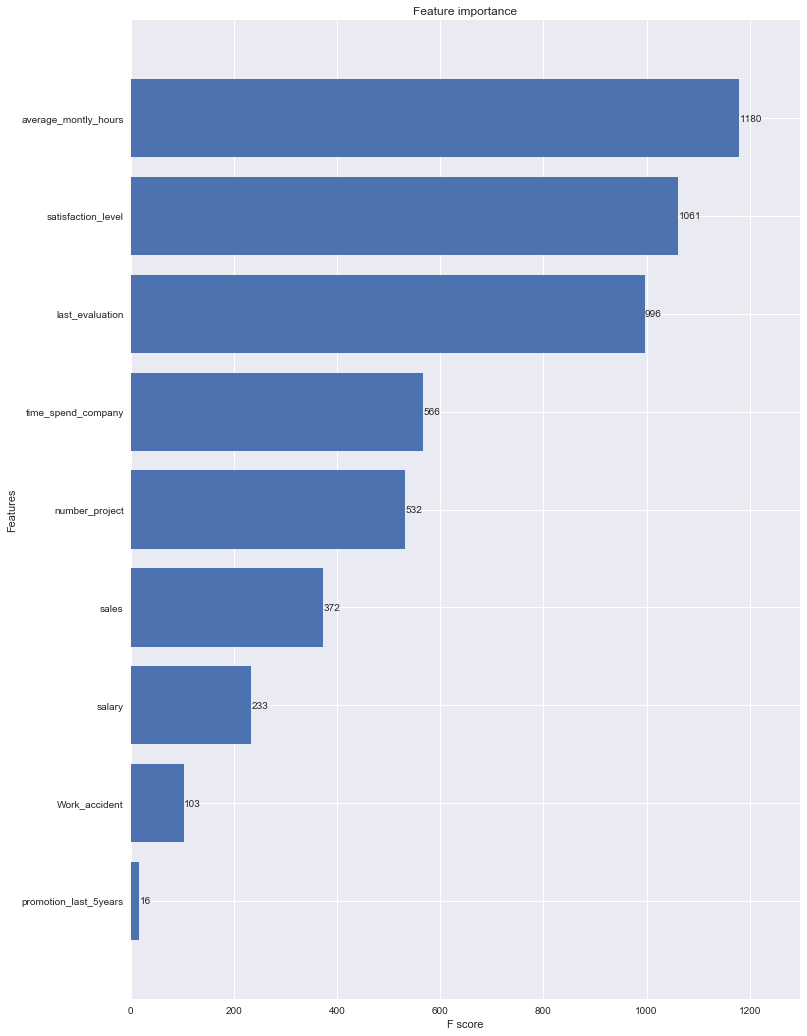

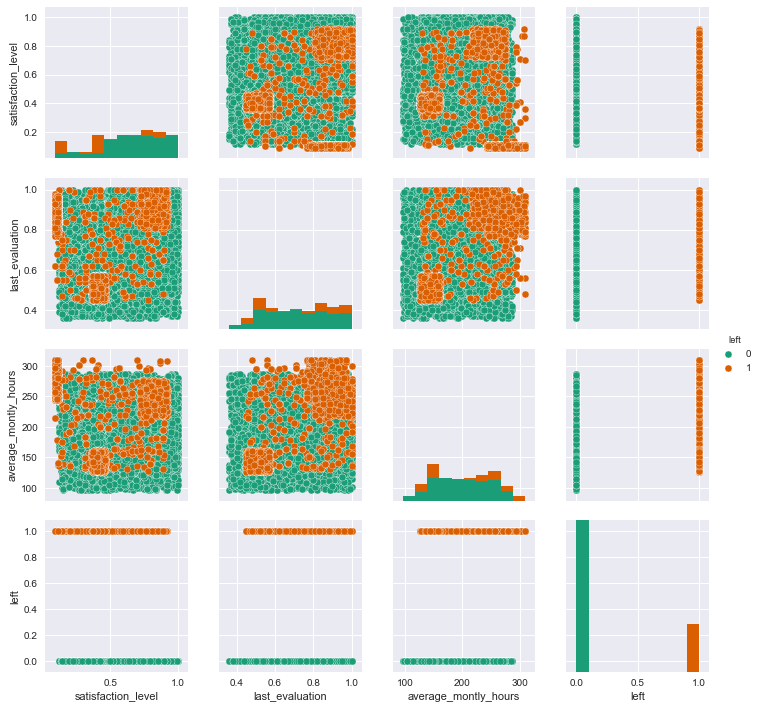

In [33]:
#Define XGB Params 
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'silent': 1      
}

dtrain = xgb.DMatrix(train_x, train_y, feature_names=train_x.columns.values) #Data Matrix for XGB
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

#XGB gives an idea about feature importance - It will help in feature engineering 

df1 = clean_df[['satisfaction_level','last_evaluation', 'average_montly_hours','left']]
sns.pairplot(df1,hue='left',palette='Dark2') #Drawing the scatterplot

The features and pair plots suggest that the feature "average monthly hours" is the main reason for star performers leaving the organization
